In [3]:
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
%pylab inline
from collections import Counter
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [31]:
train = pd.read_csv("train_starting.csv")
test = pd.read_csv("test_starting.csv")

In [5]:
train.columns

Index([u'Unnamed: 0', u'id', u'date_account_created',
       u'timestamp_first_active', u'date_first_booking', u'gender', u'age',
       u'signup_method', u'signup_flow', u'language', u'affiliate_channel',
       u'affiliate_provider', u'first_affiliate_tracked', u'signup_app',
       u'first_device_type', u'first_browser', u'country_destination',
       u'lag_account_created', u'lag_first_active',
       u'lag_account_created_first_active', u'bookings',
       u'population_in_thousands', u'sum_secs_elapsed', u'counts'],
      dtype='object')

In [17]:
#Turn training data that are dates into timestamps

train.date_account_created = pd.to_datetime(train.date_account_created)
train.timestamp_first_active = pd.to_datetime(train.timestamp_first_active)
train.date_first_booking = pd.to_datetime(train.date_first_booking)

In [22]:
# y is the number of days between when an account was created and date of first booking

x = (train.date_first_booking - train.date_account_created)

y = x.apply(lambda x: x if pd.isnull(x) else x.days)

In [25]:
y

0          NaT
1          NaT
2          -57
3          278
4         -208
5            1
6            3
7           10
8          206
9            0
10           2
11         NaT
12          13
13         NaT
14         NaT
15           1
16         NaT
17           2
18         NaT
19           0
20           8
21           1
22           0
23         NaT
24         NaT
25           3
26         NaT
27          10
28           0
29           6
          ... 
213421     NaT
213422     NaT
213423     NaT
213424     NaT
213425     NaT
213426     NaT
213427     NaT
213428     NaT
213429     NaT
213430     NaT
213431     NaT
213432     NaT
213433     NaT
213434     NaT
213435     NaT
213436     NaT
213437     NaT
213438     NaT
213439     259
213440     NaT
213441      44
213442     NaT
213443      13
213444     NaT
213445       2
213446     NaT
213447     NaT
213448     NaT
213449     NaT
213450     NaT
dtype: object

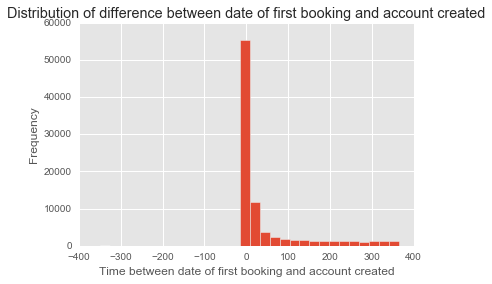

In [28]:
#Distribution of the difference between date of first booking and account created.

plt.style.use('ggplot')
y.hist(bins = 30)
plt.xlabel('Time between date of first booking and account created')
plt.ylabel('Frequency')
plt.title('Distribution of difference between date of first booking and account created')